![](2022-11-25-20-46-55.png)

In [2]:
import pyomo.environ as pyo
import matplotlib.pyplot as plt

# Coordination of points are
* a =(0,0)
* b =(4,0)
* c =(0,6)

Text(1.25, 2.25, '(X,Y)')

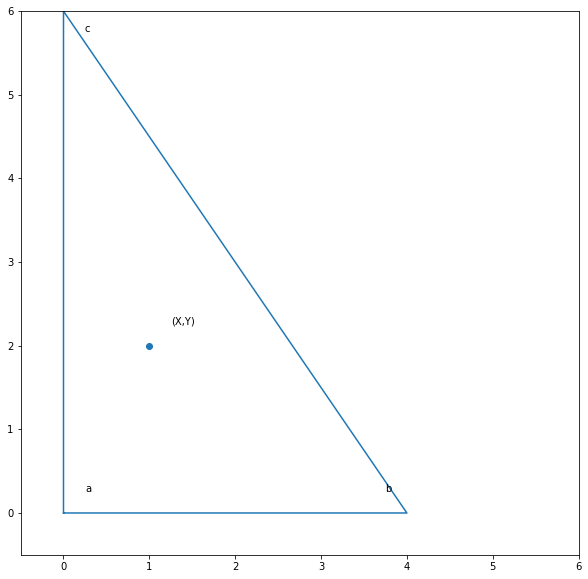

In [23]:
plt.figure(figsize=(10,10))
plt.plot([0,4,0,0],[0,0,6,0])
plt.annotate('a',(0.25,0.25))
plt.annotate('b',(3.75,0.25))
plt.annotate('c',(0.25,5.75))
plt.xlim(-0.5,6)
plt.ylim(-0.5,6)

plt.scatter(1,2)
plt.annotate('(X,Y)',(1.25,2.25))

In [32]:
# initialize the model
model = pyo.ConcreteModel()

# Define the parameters and the variables
model.ax = pyo.Param(initialize =0)
model.ay = pyo.Param(initialize =0)
model.bx = pyo.Param(initialize =4)
model.by = pyo.Param(initialize =0)
model.cx = pyo.Param(initialize =0)
model.cy = pyo.Param(initialize =6)

model.X = pyo.Var(bounds=(0, model.bx), initialize=0.1)
model.Y = pyo.Var(bounds=(0, model.cy), initialize=0.1)

# Define the constraints

# Define the objective Function
model.OF = pyo.Objective(expr= pyo.sqrt((model.ax-model.X)**2 + (model.ay-model.Y)**2)
                        + pyo.sqrt((model.bx-model.X)**2 + (model.by-model.Y)**2)
                        + pyo.sqrt((model.cx-model.X)**2 + (model.cy-model.Y)**2) , sense=pyo.minimize)

# Define the solver
solver = pyo.SolverFactory('ipopt')

#Solve the problem
results = solver.solve(model)

# write the results
results.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 2
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.11.1\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.05990242958068848
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


In [33]:
print('X: ', pyo.value(model.X))
print('Y: ', pyo.value(model.Y))
print('OF: ', pyo.value(model.OF))

X:  1.065658279695394
Y:  0.9572509036485686
OF:  9.673118389725882


Text(1.25, 2.25, '(X,Y)')

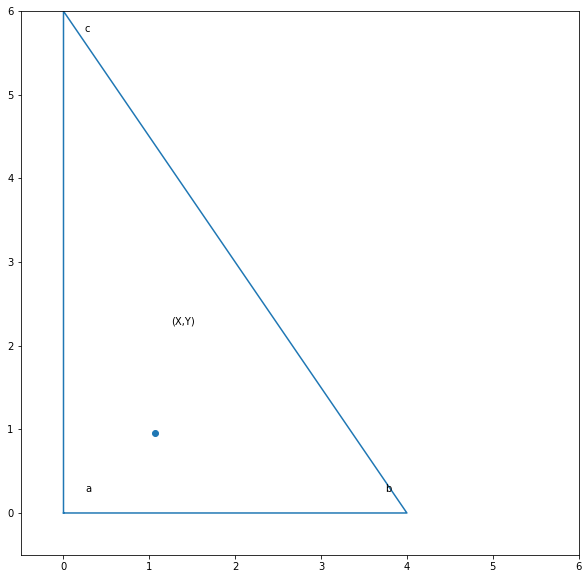

In [34]:
plt.figure(figsize=(10,10))
plt.plot([0,4,0,0],[0,0,6,0])
plt.annotate('a',(0.25,0.25))
plt.annotate('b',(3.75,0.25))
plt.annotate('c',(0.25,5.75))
plt.xlim(-0.5,6)
plt.ylim(-0.5,6)

plt.scatter(pyo.value(model.X),pyo.value(model.Y))
plt.annotate('(X,Y)',(1.25,2.25))